In [ ]:
## Jupyter notebook file to calculate poisson ratio of simulated network during tensile deformation
## This is calculated from the network width, estimated using the file mp_test_mean_density_during_tensile_consistent_density.py
## Devosmita Sen##
## August 2024 ##

def readLAMMPS_after_netgen(filename, vflag,G):

   f1=open(filename,"r")

   line1 = f1.readline()
   line2 = f1.readline()

   line3 = f1.readline()
   line3 = line3.strip()
   n_links = int(line3.split(" ")[0])
 
   line4 = f1.readline()
   line4 = line4.strip()
   atom_types = int(line4.split(" ")[0])

   line5 = f1.readline()
   line5 = line5.strip()
   n_chains = int(line5.split(" ")[0])

   line6 = f1.readline()
           
   line6 = line6.strip()
   bond_types = int(line6.split(" ")[0])

   links_unsort  = np.zeros((n_links,4))
   links   = np.zeros((n_links,3), dtype = float)
   chains  = np.full((n_chains,4), -1, dtype = int)
   mass    = np.zeros(atom_types, dtype = float)

   line7 = f1.readline()
   line8 = f1.readline()
   line8 = line8.strip()
   xlo = float(line8.split(" ")[0])
   xhi = float(line8.split(" ")[1])

   line9 = f1.readline()
   line9 = line9.strip()
   ylo = xlo ##float(line9.split(" ")[0])
   yhi = xhi ##float(line9.split(" ")[1])

   line10 = f1.readline()
   line10 = line10.strip()
   zlo = xlo ##float(line10.split(" ")[0])
   zhi = xhi ##float(line10.split(" ")[1])


   for i in range (0, 3):
       f1.readline()
   
   for i in range(0, atom_types):
       line = f1.readline()
       line = line.strip()
       mass[i] = float(line.split(" ")[1])

   f1.close()


   links_unsort = np.genfromtxt(filename, usecols=(0,3,4,5), skip_header=18, max_rows=n_links)

   for i in range(0, n_links):
       index = int(links_unsort[i,0])
       links[index-1,:] = links_unsort[i,1:4]


##   chains[:,0] = N
#cnt,ctype,1,conn1,conn2
   if(vflag==0):
      chains[:,0:4] = np.genfromtxt(filename,usecols=(0,1,2,3), skip_header=17+n_links+3, max_rows=n_chains)
   elif(vflag==1):
      chains[:,0:4] = np.genfromtxt(filename,usecols=(0,1,2,3), skip_header=17+2*n_links+2*3, max_rows=n_chains)
   else:
      print("Invalid Velocity Flag")
##   print(chains)

   for c in chains:
      [lnk_1,lnk_2]=c[2:4]
      G.add_edge(lnk_1,lnk_2)
##   directory = './'+str(int(100*frac_weak))+'/'
   ##filename = './0/primary_loops'
##   file_path = os.path.join(directory, filename)
##   if not os.path.isdir(directory):
##      os.mkdir(directory)  
   loop_atoms = [] ##np.genfromtxt(filename , usecols=(1), skip_header=0)
   ##loop_atoms.tolist() 

   return xlo, xhi, ylo, yhi, zlo, zhi, n_links, n_chains, links, chains, atom_types, bond_types, mass, loop_atoms,G


too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
index 33 is out of bounds for axis 0 with size 33
index 34 is out of bounds for axis 0 with size 33
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
index 33 is out of bounds for axis 0 with size 33
index 34 is out of bounds for axis 0 with size 33
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
index 33 is out of 

/state/partition1/slurm_tmp/27494420.0.0/ipykernel_2035376/978814163.py:266: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
index 33 is out of bounds for axis 0 with size 33
index 34 is out of bounds for axis 0 with size 33
too many indices for array: array is 1-dimensional, but 2 were indexed
run_not_found [32 33 34 35 36]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'stop' is not defined

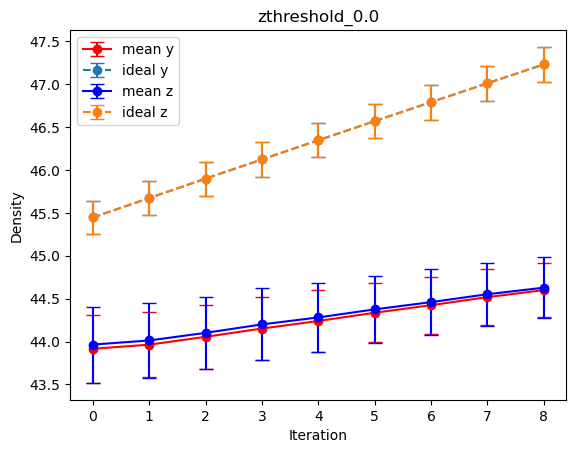

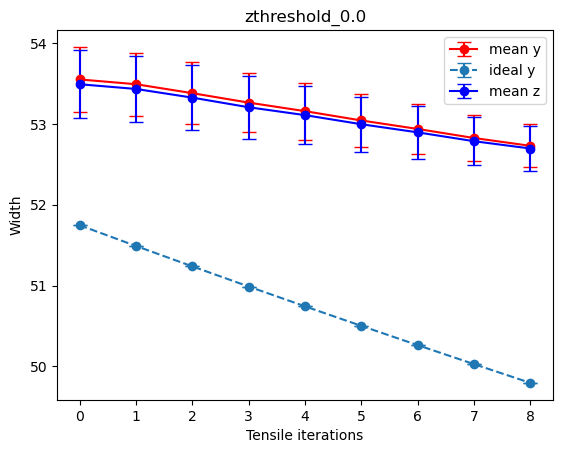

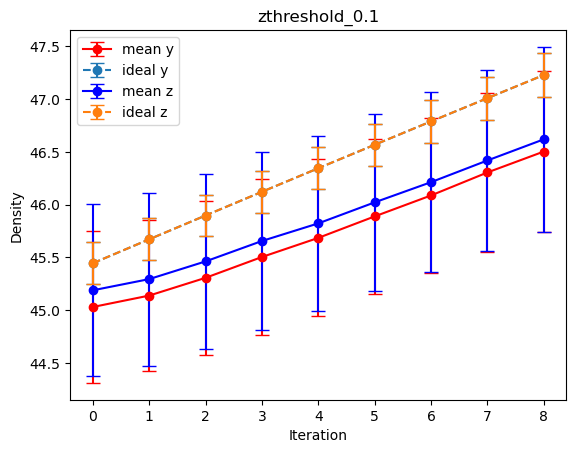

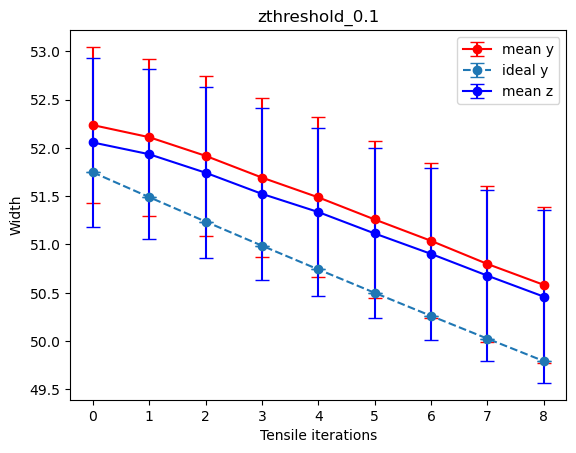

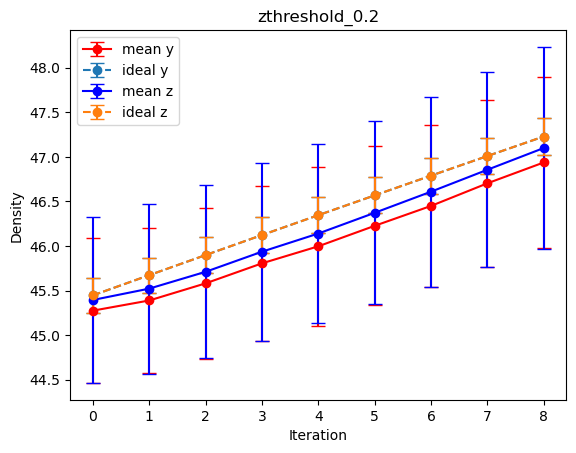

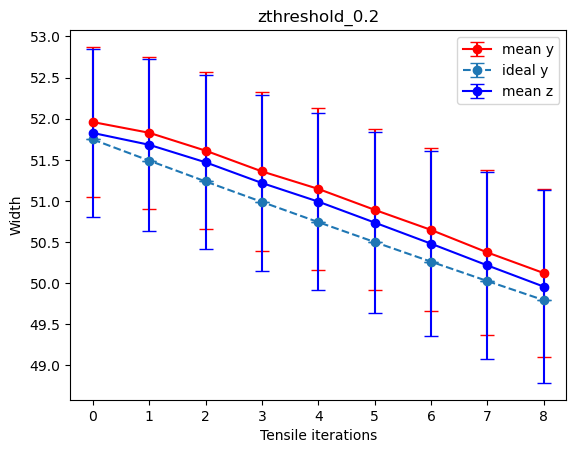

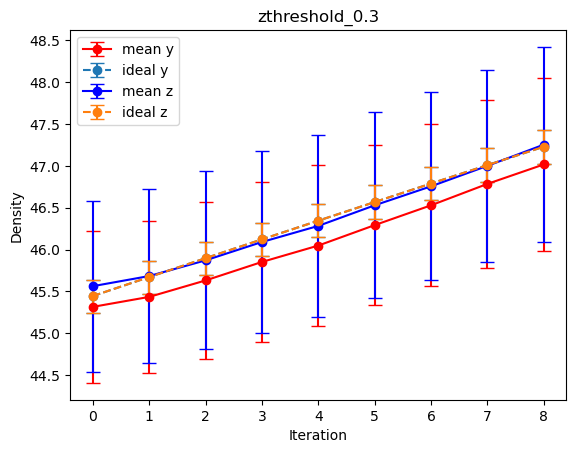

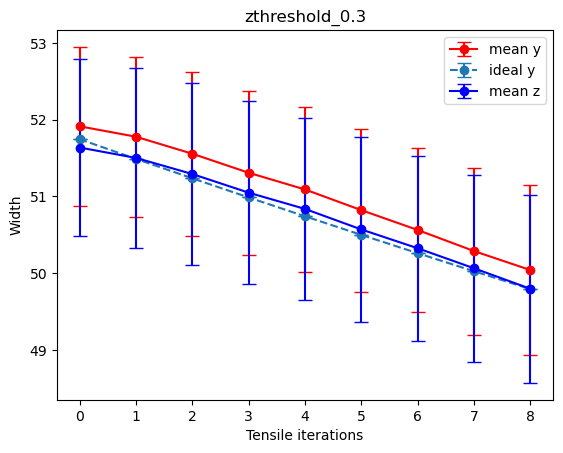

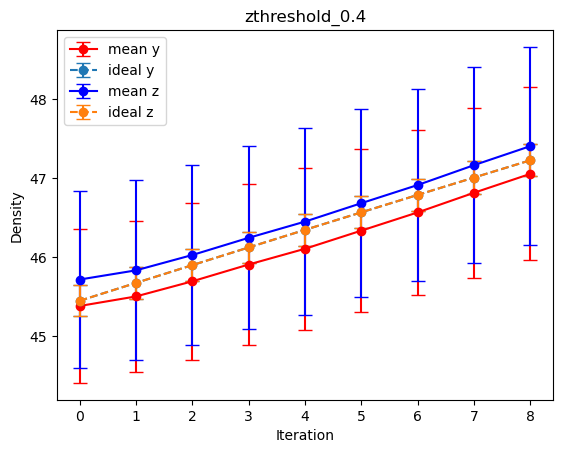

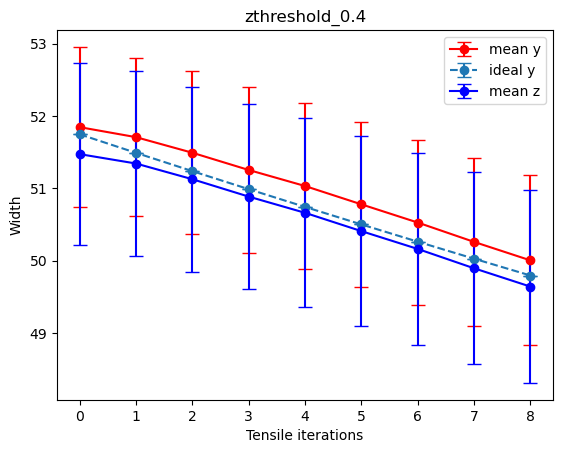

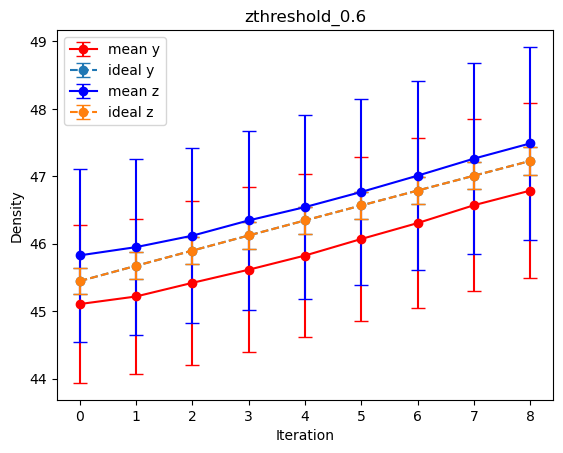

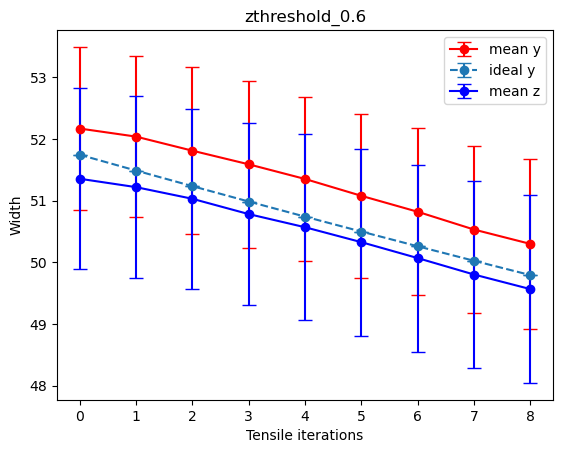

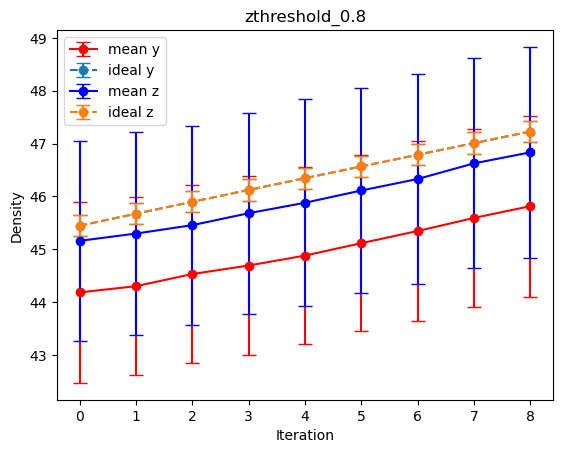

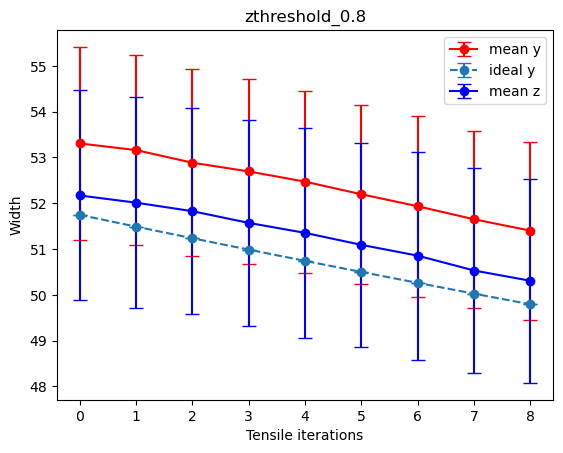

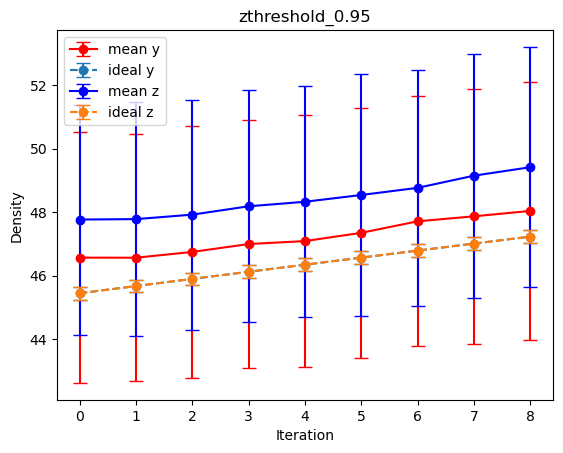

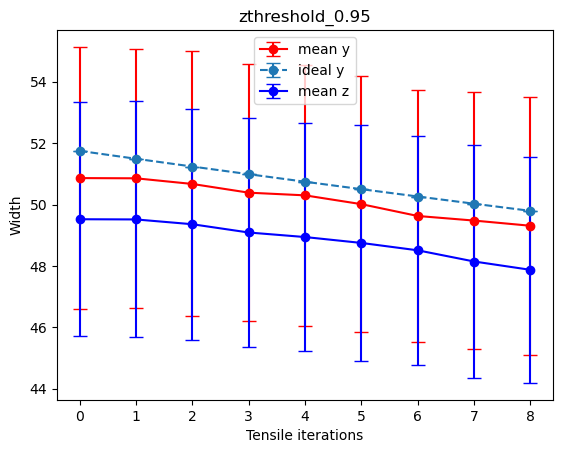

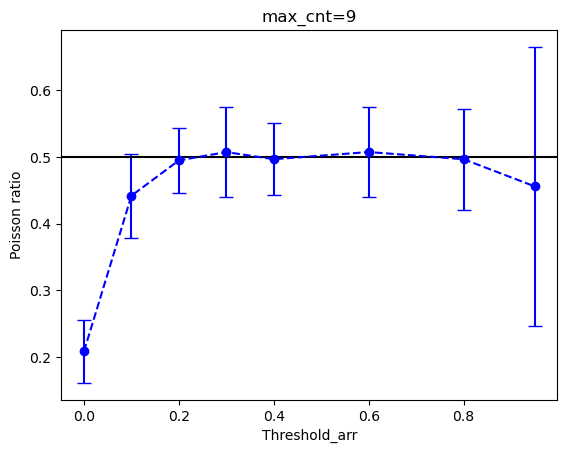

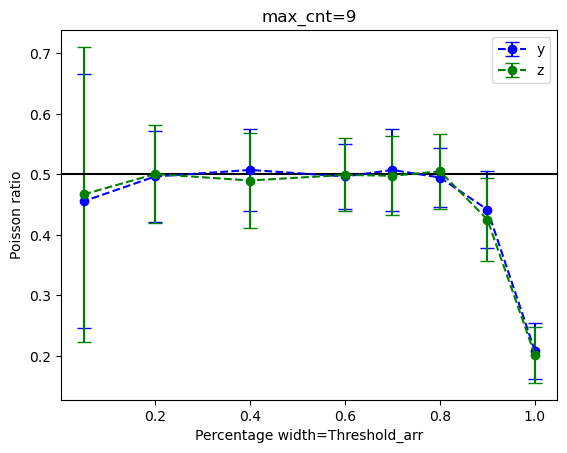

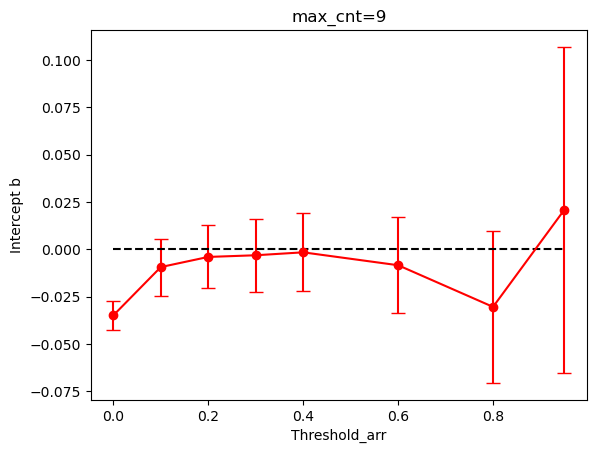

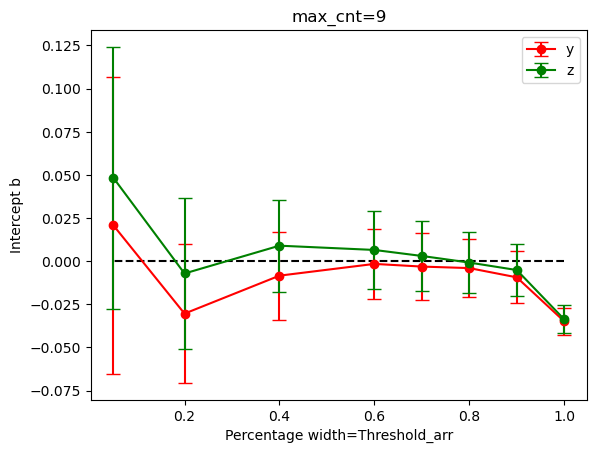

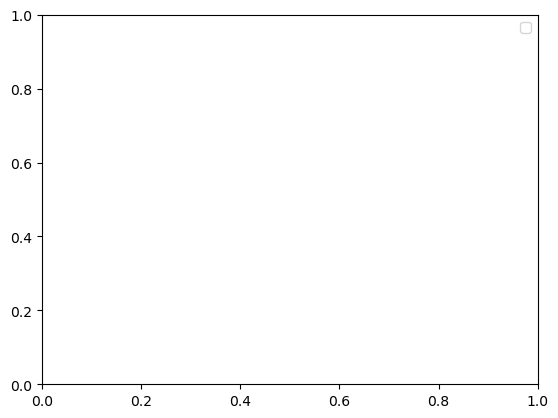

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import Run1.param as p
run_arr=np.arange(1,37, dtype='int')#,2,3,4,5,6,7,8,9,10]
##perc_width=[1.4 , 1.2 , 1.  , 0.9 , 0.8 , 0.7 , 0.6 , 0.5 , 0.4 , 0.3 , 0.2 ,0.1 , 0.01]
##perc_width=np.arange(0,50,5)

plt.close("all")

ite_arr=np.arange(0,15,1)
cnts=np.arange(0,9,1, dtype='int')
ite_arr=ite_arr[cnts]
mean_density_y=np.zeros((len(run_arr),len(cnts)))
mean_density_z=np.zeros((len(run_arr),len(cnts)))
ideal_density_y=np.zeros((len(run_arr),len(cnts)))
ideal_density_z=np.zeros((len(run_arr),len(cnts)))

width_y=np.zeros((len(run_arr),len(cnts)))
width_z=np.zeros((len(run_arr),len(cnts)))
ideal_width_arr=np.zeros((len(run_arr),len(cnts)))
##ideal_density_z=np.zeros((len(run_arr),len(perc_width)))
##threshold_arr=np.array([-0.2,-0.1,-0.05,0.0,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.8,0.99]) ##=np.array([-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])##np.array([-0.4,-0.2,-0.1,0.0,0.1,0.2,0.3])#,0.4,0.5,0.6,0.7,0.8,0.9,0.99])##np.array([-0.4,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])  ##np.array([0.0,0.1,0.2])#,0.4,0.5,0.6,0.7,0.8,0.9,0.99])##np.array([-0.4,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]) # the actual range over which i am probing
##threshold_arr=np.array([0.0,0.02,0.05,0.07,0.1,0.12,0.15,0.17,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,0.95])###np.arange(0.1,0.0,len(ite_arr))
threshold_arr=np.array([0.0,0.1,0.2,0.3,0.4,0.6,0.8,0.95])
##perc_width=1-threshold_arr
poisson_arr=np.zeros((len(threshold_arr)))
poisson_arr_std=np.zeros((len(threshold_arr)))

b_ideal_arr=np.zeros((len(threshold_arr)))## intercept of fitting
b_arr=np.zeros((len(threshold_arr)))## intercept of fitting
b_arr_std=np.zeros((len(threshold_arr)))#


poisson_arr_z=np.zeros((len(threshold_arr)))
poisson_arr_std_z=np.zeros((len(threshold_arr)))

##b_ideal_arr=np.zeros((len(threshold_arr)))## intercept of fitting
b_arr_z=np.zeros((len(threshold_arr)))## intercept of fitting
b_arr_std_z=np.zeros((len(threshold_arr)))#


cnt_thr=-1

filename="./Run1/0/restart_network_"+str(0)+".txt"
vflag=0
import networkx as nx
G=nx.Graph()
[xlo, xhi, ylo, yhi, zlo, zhi, n_atoms, n_bonds, atoms, bonds, 
                  atom_types, bond_types, mass, loop_atoms,G] = readLAMMPS_after_netgen(filename, vflag,G)
    ##stop
Ly0=yhi-ylo

max_cnt=len(ite_arr) ## number of points over which poisson ratio is to be calculated
run_not_found=[]
for threshold in threshold_arr:
    cnt_thr=cnt_thr+1
    poisson_all_runs=[]
    b_all_runs=[]
    
    poisson_all_runs_z=[]
    b_all_runs_z=[]
    
    b_ideal_all_runs=[]
    
    cnt=-1
    for run in run_arr:
      
        
       
        
        
        
      
      try:
       
        cnt=cnt+1
        data=np.genfromtxt('./Run'+str(run)+'/mean_density_y_tensile_'+str(threshold)+'_test.txt')
        ##perc_width=data[:,0]
        mean_density=data[cnts,1]
        ##plt.figure(1)
        ##plt.plot(ite_arr,mean_density,label='Run'+str(run))
        ##plt.title('y')
        mean_density_y[cnt,:]=mean_density
        
        ##stop

        data=np.genfromtxt('./Run'+str(run)+'/ideal_density_y_tensile_'+str(threshold)+'_test.txt')
        ##perc_width=data[:,0]
        ideal_density=data[cnts,1]
        ##plt.figure(1)
        ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
        ##plt.title('y')
        ideal_density_y[cnt,:]=ideal_density

        
            

        data=np.genfromtxt('./Run'+str(run)+'/mean_density_z_tensile_'+str(threshold)+'_test.txt')
        ##perc_width=data[:,0]
        mean_density=data[cnts,1]
        ##plt.figure(2)
        ##plt.plot(ite_arr,mean_density,label='Run'+str(run))
        ##plt.title('z')
        mean_density_z[cnt,:]=mean_density

        data=np.genfromtxt('./Run'+str(run)+'/ideal_density_z_tensile_'+str(threshold)+'_test.txt')
        ##perc_width=data[:,0]
        ideal_density=data[cnts,1]
        ##plt.figure(1)
        ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
        ##plt.title('y')
        ideal_density_z[cnt,:]=ideal_density


        ##plt.figure(2)
        data=np.genfromtxt('./Run'+str(run)+'/ideal_width_y_tensile_'+str(threshold)+'_test.txt')
        ##perc_width=data[:,0]
        ideal_width=data[cnts,1]
        ##plt.figure(1)
        ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
        ##plt.title('y')
        ideal_width_arr[cnt,:]=ideal_width

        data=np.genfromtxt('./Run'+str(run)+'/width_y_tensile_'+str(threshold)+'_test.txt')
        ##perc_width=data[:,0]
        ideal_width=data[cnts,1]
        ##plt.figure(1)
        ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
        ##plt.title('y')
        width_y[cnt,:]=ideal_width

        data=np.genfromtxt('./Run'+str(run)+'/width_z_tensile_'+str(threshold)+'_test.txt')
        ##perc_width=data[:,0]
        ideal_width=data[cnts,1]
        ##plt.figure(1)
        ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
        ##plt.title('y')
        width_z[cnt,:]=ideal_width
        
        x=np.log(np.array(ite_arr[0:max_cnt])*p.e_rate*p.del_t+1)
        y=-np.log(np.array((width_y[cnt,0:max_cnt]))/Ly0)
        m,b = np.polyfit(x, y, 1) ##b=slope, m=intercept
        poisson_all_runs.append(m)
        b_all_runs.append(b)
        
        
        x=np.log(np.array(ite_arr[0:max_cnt])*p.e_rate*p.del_t+1)
        y=-np.log(np.array((width_z[cnt,0:max_cnt]))/Ly0)
        m,b = np.polyfit(x, y, 1) ##b=slope, m=intercept
        poisson_all_runs_z.append(m)
        b_all_runs_z.append(b)
        
        x=np.log(np.array(ite_arr[0:max_cnt])*p.e_rate*p.del_t+1)
        y=-np.log(np.array((ideal_width_arr[cnt,0:max_cnt]))/Ly0)
        m_ideal,b_ideal= np.polyfit(x, y, 1) ##b=slope, m=intercept
        
        b_ideal_all_runs.append(b_ideal)
        
      except Exception as e:
        print(e)
        ##print('run ',str(run),' not found')
        run_not_found.append(run)
        continue
        
    mean_density_y=mean_density_y[np.where(mean_density_y[:,0]!=0)[0],:]
    ideal_density_y=ideal_density_y[np.where(ideal_density_y[:,0]!=0)[0],:]
    mean_density_z=mean_density_z[np.where(mean_density_z[:,0]!=0)[0],:]
    ideal_density_z=ideal_density_z[np.where(ideal_density_z[:,0]!=0)[0],:]
    width_y=width_y[np.where(width_y[:,0]!=0)[0],:]
    width_z=width_z[np.where(width_z[:,0]!=0)[0],:]
    ideal_width_arr=ideal_width_arr[np.where(ideal_width_arr[:,0]!=0)[0],:]
    
    
    poisson_arr[cnt_thr]=np.mean(poisson_all_runs)
    poisson_arr_std[cnt_thr]=np.std(poisson_all_runs)
    
    b_ideal_arr[cnt_thr]=np.mean(b_ideal_all_runs)
    b_arr[cnt_thr]=np.mean(b_all_runs)

    b_arr_std[cnt_thr]=np.std(b_all_runs)
    
    poisson_arr_z[cnt_thr]=np.mean(poisson_all_runs_z)
    poisson_arr_std_z[cnt_thr]=np.std(poisson_all_runs_z)
    
    ##b_ideal_arr[cnt_thr]=np.mean(b_ideal_all_runs)
    b_arr_z[cnt_thr]=np.mean(b_all_runs_z)

    b_arr_std_z[cnt_thr]=np.std(b_all_runs_z)

    plt.figure()
    plt.title('y'+'threshold_'+str(threshold))
    plt.errorbar(ite_arr,np.mean(mean_density_y,axis=0),yerr=np.std(mean_density_y,axis=0),capsize=5,fmt="r-o", label='mean y')
    plt.errorbar(ite_arr,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal y')
    plt.xlabel('Iteration')
    plt.ylabel('Density')
    plt.legend()
    

    ##plt.figure()
    plt.title('z'+'threshold_'+str(threshold))
    plt.errorbar(ite_arr,np.mean(mean_density_z,axis=0),yerr=np.std(mean_density_z,axis=0),capsize=5,fmt="b-o", label='mean z')
    plt.errorbar(ite_arr,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal z')
    plt.xlabel('Iteration')
    plt.ylabel('Density')

    plt.legend()

    plt.figure()
    plt.title('y'+'threshold_'+str(threshold))
    plt.errorbar(ite_arr,np.mean(width_y,axis=0),yerr=np.std(width_y,axis=0),capsize=5,fmt="r-o", label='mean y')
    plt.errorbar(ite_arr,np.mean(ideal_width_arr,axis=0),yerr=np.std(ideal_width_arr,axis=0),capsize=5,fmt="--o", label='ideal y')
    plt.xlabel('Tensile iterations')
    plt.ylabel('Width')
    plt.legend()

    ##plt.figure()
    plt.title('z'+'threshold_'+str(threshold))
    plt.errorbar(ite_arr,np.mean(width_z,axis=0),yerr=np.std(width_z,axis=0),capsize=5,fmt="b-o", label='mean z')
    ##plt.errorbar(perc_width,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal z')
    plt.xlabel('Tensile iterations')
    plt.ylabel('Width')
    plt.legend()
    
    
    
run_not_found=np.unique(np.array(run_not_found))
print('run_not_found',run_not_found)
plt.figure()
plt.title('max_cnt='+str(max_cnt))
plt.errorbar(threshold_arr,poisson_arr,yerr=poisson_arr_std,fmt='b--o',capsize=5)
plt.xlabel('Threshold_arr')
plt.ylabel('Poisson ratio')
plt.axhline(y=0.5,color='k')
##plt.ylim([0,0.5])

plt.figure()
plt.title('max_cnt='+str(max_cnt))
plt.errorbar(1-threshold_arr,poisson_arr,yerr=poisson_arr_std,fmt='b--o',capsize=5, label='y')
plt.errorbar(1-threshold_arr,poisson_arr_z,yerr=poisson_arr_std_z,fmt='g--o',capsize=5, label='z')
plt.xlabel('Percentage width=Threshold_arr')
plt.ylabel('Poisson ratio')
plt.axhline(y=0.5,color='k')
plt.legend()
##plt.ylim([0,0.5])

plt.figure()
plt.title('max_cnt='+str(max_cnt))
plt.errorbar(threshold_arr,b_arr,yerr=b_arr_std,fmt='ro-',capsize=5)
##plt.errorbar(threshold_arr,b_arr,yerr=b_arr_std,fmt='ro-',capsize=5)
plt.plot(threshold_arr,b_ideal_arr,'k--')
plt.xlabel('Threshold_arr')
plt.ylabel('Intercept b')

#plt.ylim([0,0.5])

plt.figure()
plt.title('max_cnt='+str(max_cnt))
plt.plot(1-threshold_arr,b_ideal_arr,'k--')
plt.errorbar(1-threshold_arr,b_arr,yerr=b_arr_std,fmt='ro-',capsize=5,label='y')
plt.errorbar(1-threshold_arr,b_arr_z,yerr=b_arr_std_z,fmt='go-',capsize=5,label='z')
plt.xlabel('Percentage width=Threshold_arr')
plt.ylabel('Intercept b')
plt.legend()
#plt.ylim([0,0.5])

plt.figure()
##ite_arr=[0,15]
'''
for ite in ite_arr:
    ##plt.figure()
    data=np.genfromtxt('density_y_z_ite_'+str(ite)+'.txt')
    markers, caps, bars =plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],label=str(ite), capsize=5)
    ##markers, caps, bars =plt.errorbar(lam_list,stress_mean, yerr=stress_std,fmt="r-o")##,ecolor="black")
    [bar.set_alpha(0.05) for bar in bars]
    [cap.set_alpha(0.05) for cap in caps]
    x=data[:,0]
    y=data[:,1]
    y_err=data[:,2]
    
    ##if(threshold==threshold_arr[0]):
    print(np.sum(y),np.sum(y_err) )
    ##plt.fill_between(x, y - y_err, y + y_err, alpha=0.05, label='Error range')
    ##print(np.sum(data[:,1]))
    ##plt.errorbar(data[:,0],data[:,3],yerr=data[:,4], label='z', capsize=5)
    plt.axvline(x = Ly0, color = 'k')##, label = 'axvline - full height')
    plt.axvline(x = 0, color = 'k')
    ##print(Ly0)
for threshold in threshold_arr[0:10]:
    plt.axvline(x=Ly0-Ly0*(threshold)*0.5,color='r')
    plt.axvline(x=0+Ly0*(threshold)*0.5,color='r')
    plt.axvline(x=Ly0*0.5,color='k')
    print('threshold',threshold)
##for ite in ite_arr:
'''
plt.legend()  
np.savetxt('poisson_ratio_data_y.txt',np.transpose(np.array([1-threshold_arr,poisson_arr,poisson_arr_std])))
np.savetxt('b_data_y.txt',np.transpose(np.array([1-threshold_arr,b_arr,b_arr_std])))

plt.legend()  
np.savetxt('poisson_ratio_data_z.txt',np.transpose(np.array([1-threshold_arr,poisson_arr_z,poisson_arr_std_z])))
np.savetxt('b_data_z.txt',np.transpose(np.array([1-threshold_arr,b_arr_z,b_arr_std_z])))


stop



In [ ]:
import os
print(os.getcwd())

In [ ]:
ideal_width_arr[np.where(ideal_width_arr[:,0]!=0)[0],:]

In [ ]:
ideal_width_arr[:,0]

In [ ]:
data[cnts,1]

In [ ]:

plt.figure()
##ite_arr=[0,15]
for ite in ite_arr:
    ##plt.figure()
    data=np.genfromtxt('density_y_z_ite_'+str(ite)+'.txt')
    markers, caps, bars =plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],label=str(ite), capsize=5)
    ##markers, caps, bars =plt.errorbar(lam_list,stress_mean, yerr=stress_std,fmt="r-o")##,ecolor="black")
    [bar.set_alpha(0.05) for bar in bars]
    [cap.set_alpha(0.05) for cap in caps]
    x=data[:,0]
    y=data[:,1]
    y_err=data[:,2]
    ##plt.fill_between(x, y - y_err, y + y_err, alpha=0.05, label='Error range')
    print(np.sum(data[:,1]))
    ##plt.errorbar(data[:,0],data[:,3],yerr=data[:,4], label='z', capsize=5)
    plt.axvline(x = Ly0, color = 'k')##, label = 'axvline - full height')
    plt.axvline(x = 0, color = 'k')
##for ite in ite_arr:

In [ ]:
np.genfromtxt('./Run'+str(run)+'/mean_density_y_tensile_'+str(threshold)+'_test.txt')

In [ ]:
b_ideal_arr

In [ ]:
import Run1.param as p
p.epsilon

In [ ]:
def readLAMMPS_after_netgen(filename, vflag,G):

   f1=open(filename,"r")

   line1 = f1.readline()
   line2 = f1.readline()

   line3 = f1.readline()
   line3 = line3.strip()
   n_links = int(line3.split(" ")[0])
 
   line4 = f1.readline()
   line4 = line4.strip()
   atom_types = int(line4.split(" ")[0])

   line5 = f1.readline()
   line5 = line5.strip()
   n_chains = int(line5.split(" ")[0])

   line6 = f1.readline()
           
   line6 = line6.strip()
   bond_types = int(line6.split(" ")[0])

   links_unsort  = np.zeros((n_links,4))
   links   = np.zeros((n_links,3), dtype = float)
   chains  = np.full((n_chains,4), -1, dtype = int)
   mass    = np.zeros(atom_types, dtype = float)

   line7 = f1.readline()
   line8 = f1.readline()
   line8 = line8.strip()
   xlo = float(line8.split(" ")[0])
   xhi = float(line8.split(" ")[1])

   line9 = f1.readline()
   line9 = line9.strip()
   ylo = xlo ##float(line9.split(" ")[0])
   yhi = xhi ##float(line9.split(" ")[1])

   line10 = f1.readline()
   line10 = line10.strip()
   zlo = xlo ##float(line10.split(" ")[0])
   zhi = xhi ##float(line10.split(" ")[1])


   for i in range (0, 3):
       f1.readline()
   
   for i in range(0, atom_types):
       line = f1.readline()
       line = line.strip()
       mass[i] = float(line.split(" ")[1])

   f1.close()


   links_unsort = np.genfromtxt(filename, usecols=(0,3,4,5), skip_header=18, max_rows=n_links)

   for i in range(0, n_links):
       index = int(links_unsort[i,0])
       links[index-1,:] = links_unsort[i,1:4]


##   chains[:,0] = N
#cnt,ctype,1,conn1,conn2
   if(vflag==0):
      chains[:,0:4] = np.genfromtxt(filename,usecols=(0,1,2,3), skip_header=17+n_links+3, max_rows=n_chains)
   elif(vflag==1):
      chains[:,0:4] = np.genfromtxt(filename,usecols=(0,1,2,3), skip_header=17+2*n_links+2*3, max_rows=n_chains)
   else:
      print("Invalid Velocity Flag")
##   print(chains)

   for c in chains:
      [lnk_1,lnk_2]=c[2:4]
      G.add_edge(lnk_1,lnk_2)
##   directory = './'+str(int(100*frac_weak))+'/'
   ##filename = './0/primary_loops'
##   file_path = os.path.join(directory, filename)
##   if not os.path.isdir(directory):
##      os.mkdir(directory)  
   loop_atoms = [] ##np.genfromtxt(filename , usecols=(1), skip_header=0)
   ##loop_atoms.tolist() 

   return xlo, xhi, ylo, yhi, zlo, zhi, n_links, n_chains, links, chains, atom_types, bond_types, mass, loop_atoms,G


In [ ]:
filename="./Run1/0/restart_network_"+str(0)+".txt"
vflag=0
import networkx as nx
G=nx.Graph()
[xlo, xhi, ylo, yhi, zlo, zhi, n_atoms, n_bonds, atoms, bonds, 
                  atom_types, bond_types, mass, loop_atoms,G] = readLAMMPS_after_netgen(filename, vflag,G)
    ##stop
Ly0=yhi-ylo

plt.figure()
ite_arr=perc_width[0:5]

##plt.figure()

##plt.plot((np.array(ite_arr)*0.01+1), (np.array(np.mean(ideal_width_arr[:,0:5], axis=0))),'ko-', label='ideal', markersize=8, linewidth=2)
plt.figure()
poisson_all=[]
b_all=[]
for run in run_arr:
    ##plt.plot(np.log(np.array(ite_arr)*0.01+1), -np.log(np.array((ideal_width_arr[run-1,0:5]))/Ly0),'ko-', label='ideal', markersize=8, linewidth=2)
    ##plt.plot(np.log(np.array(ite_arr)*0.01+1), -np.log(np.array(np.mean(width_y[run-1,0:5], axis=0))/Ly0),'bo-', label='with EV', markersize=8, linewidth=2)
    x=np.log(np.array(ite_arr)*0.01+1)
    y=-np.log(np.array((width_y[run-1,0:5]))/Ly0)
    m,b = np.polyfit(x, y, 1) ##b=slope, m=intercept
    poisson_all.append(m)
    b_all.append(b)
    
####<Figure size 640x480 with 0 Axes>
plt.plot(np.log(np.array(ite_arr)*0.01+1), -np.log(np.array(np.mean(ideal_width_arr[:,0:5], axis=0))/Ly0),'ko-', label='ideal', markersize=8, linewidth=2)
####[<matplotlib.lines.Line2D object at 0x000001C55CD1B350>]
plt.plot(np.log(np.array(ite_arr)*0.01+1), -np.log(np.array(np.mean(width_y[:,0:5], axis=0))/Ly0),'bo-', label='with EV', markersize=8, linewidth=2)

plt.plot(x,np.mean(poisson_all)*x+np.mean(b_all),'g-', label='fit- averaged', markersize=8, linewidth=2)

x=np.log(np.array(ite_arr)*0.01+1)
y=-np.log(np.array(np.mean(width_y[:,0:5], axis=0))/Ly0)
m,b = np.polyfit(x, y, 1) ##b=slope, m=intercept
print(m,b)

poisson_all=np.array(poisson_all)
print('mean and std poisson',np.mean(poisson_all), np.std(poisson_all))
plt.plot(x,m*x+b,'r--', label='fit', markersize=8, linewidth=2)
plt.xlabel('')

print('ite_arr',ite_arr)
plt.legend()

In [ ]:
m*x+b

In [ ]:
np.mean(poisson_all)*x+np.mean(b_all)

In [ ]:
plt.figure()
plt.errorbar(perc_width,np.mean(mean_density_z,axis=0)-np.mean(ideal_density_z,axis=0),yerr=np.std(mean_density_z,axis=0)+np.std(ideal_density_z,axis=0),capsize=5,fmt="b-o", label=' z')
##plt.errorbar(perc_width,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal z')
plt.xlabel('Percentage width for averaging')
plt.ylabel('Mean-Ideal')
##plt.title('Mean-Ideal_z')
np.savetxt('mean-ideal_z_tensile.txt',np.transpose(np.array([perc_width,np.mean(mean_density_z,axis=0)-np.mean(ideal_density_z,axis=0),np.std(mean_density_z,axis=0)+np.std(ideal_density_z,axis=0)])))

##plt.figure()
plt.errorbar(perc_width,np.mean(mean_density_y,axis=0)-np.mean(ideal_density_y,axis=0),yerr=np.std(mean_density_y,axis=0)+np.std(ideal_density_y,axis=0),capsize=5,fmt="r-o", label='y')
##plt.errorbar(perc_width,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal z')
plt.xlabel('Percentage width for averaging')
plt.ylabel('Mean-Ideal')
##plt.title('Mean-Ideal_y')
np.savetxt('mean-ideal_y_tensile.txt',np.transpose(np.array([perc_width,np.mean(mean_density_y,axis=0)-np.mean(ideal_density_y,axis=0),np.std(mean_density_y,axis=0)+np.std(ideal_density_y,axis=0)])))

plt.legend()

plt.figure()
plt.errorbar(perc_width,np.mean(width_z,axis=0)-np.mean(ideal_width_arr,axis=0),yerr=np.std(width_z,axis=0)+np.std(ideal_width_arr,axis=0),capsize=5,fmt="b-o", label=' z')
##plt.errorbar(perc_width,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal z')
plt.xlabel('Percentage width for averaging')
plt.ylabel('Mean-Ideal density')
##plt.title('Mean-Ideal_z')
np.savetxt('mean-ideal_z_width_tensile.txt',np.transpose(np.array([perc_width,np.mean(width_z,axis=0)-np.mean(ideal_width_arr,axis=0),np.std(width_z,axis=0)+np.std(ideal_width_arr,axis=0)])))

##plt.figure()
plt.errorbar(perc_width,np.mean(width_y,axis=0)-np.mean(ideal_width_arr,axis=0),yerr=np.std(width_y,axis=0)+np.std(ideal_width_arr,axis=0),capsize=5,fmt="r-o", label=' y')
##plt.errorbar(perc_width,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal z')
plt.xlabel('Percentage width for averaging')
plt.ylabel('Mean-Ideal density')
##plt.title('Mean-Ideal_z')
np.savetxt('mean-ideal_y_width_tensile.txt',np.transpose(np.array([perc_width,np.mean(width_y,axis=0)-np.mean(ideal_width_arr,axis=0),np.std(width_y,axis=0)+np.std(ideal_width_arr,axis=0)])))

plt.legend()
stop

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
##run_arr=[1,2,3,4,5,6,7,8,9,10]
##perc_width=[1.4 , 1.2 , 1.  , 0.9 , 0.8 , 0.7 , 0.6 , 0.5 , 0.4 , 0.3 , 0.2 ,
       ##0.1 , 0.01]
mean_density_y=np.zeros((len(run_arr),len(perc_width)))
mean_density_z=np.zeros((len(run_arr),len(perc_width)))
ideal_density_y=np.zeros((len(run_arr),len(perc_width)))
ideal_density_z=np.zeros((len(run_arr),len(perc_width)))

width_y=np.zeros((len(run_arr),len(perc_width)))
width_z=np.zeros((len(run_arr),len(perc_width)))
ideal_width_arr=np.zeros((len(run_arr),len(perc_width)))

cnt=-1
for run in run_arr:
    cnt=cnt+1
    data=np.genfromtxt('./Run'+str(run)+'/mean_density_y_after_relax.txt')
    ##perc_width=data[:,0]
    mean_density=data[:,1]
    plt.figure(1)
    plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
    plt.title('y')
    mean_density_y[cnt]=mean_density[0:len(perc_width)]
    
    data=np.genfromtxt('./Run'+str(run)+'/ideal_density_y_after_relax.txt')
    ##perc_width=data[:,0]
    ideal_density=data[:,1]
    ##plt.figure(1)
    ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
    plt.title('y')
    ideal_density_y[cnt]=ideal_density[0:len(perc_width)]
    
    
    data=np.genfromtxt('./Run'+str(run)+'/mean_density_z_after_relax.txt')
    ##perc_width=data[:,0]
    mean_density=data[:,1]
    plt.figure(2)
    plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
    plt.title('z')
    mean_density_z[cnt]=mean_density[0:len(perc_width)]
    
    data=np.genfromtxt('./Run'+str(run)+'/ideal_density_z_after_relax.txt')
    ##perc_width=data[:,0]
    ideal_density=data[:,1]
    ##plt.figure(1)
    ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
    plt.title('y')
    ideal_density_z[cnt]=ideal_density[0:len(perc_width)]
    
    data=np.genfromtxt('./Run'+str(run)+'/width_y_after_relax.txt')
    ##perc_width=data[:,0]
    width=data[:,1]
    ##plt.figure(1)
    ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
    ##plt.title('y')
    width_y[cnt]=width[0:len(perc_width)]
    
    data=np.genfromtxt('./Run'+str(run)+'/width_z_after_relax.txt')
    ##perc_width=data[:,0]
    width=data[:,1]
    ##plt.figure(1)
    ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
    ##plt.title('y')
    width_z[cnt]=width[0:len(perc_width)]
    
     ##plt.figure(2)
    data=np.genfromtxt('./Run'+str(run)+'/ideal_width_y_after_relax.txt')
    ##perc_width=data[:,0]
    ideal_width=data[:,1]
    ##plt.figure(1)
    ##plt.plot(perc_width,mean_density[0:len(perc_width)],label='Run'+str(run))
    ##plt.title('y')
    ideal_width_arr[cnt]=ideal_width[0:len(perc_width)]
    
    
    
    
plt.figure(1)
plt.legend()

plt.figure(2)
plt.legend()


plt.figure()
plt.title('y')
plt.errorbar(perc_width,np.mean(mean_density_y,axis=0),yerr=np.std(mean_density_y,axis=0),capsize=5,fmt="r-o", label='mean y')
plt.errorbar(perc_width,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal y')
plt.xlabel('Percentage width for averaging')
plt.ylabel('Density')
plt.legend()

##plt.figure()
plt.title('z')
plt.errorbar(perc_width,np.mean(mean_density_z,axis=0),yerr=np.std(mean_density_z,axis=0),capsize=5,fmt="b-o", label='mean z')
plt.errorbar(perc_width,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal z')
plt.xlabel('Percentage width for averaging')
plt.ylabel('Density')

plt.legend()

plt.figure()
plt.title('y')
plt.errorbar(perc_width,np.mean(width_y,axis=0),yerr=np.std(width_y,axis=0),capsize=5,fmt="r-o", label='mean y')
plt.errorbar(perc_width,np.mean(ideal_width_arr,axis=0),yerr=np.std(ideal_width_arr,axis=0),capsize=5,fmt="k--o", label='ideal y')
plt.xlabel('Percentage width for averaging')
plt.ylabel('Width')
plt.legend()

##plt.figure()
plt.title('z')
plt.errorbar(perc_width,np.mean(width_z,axis=0),yerr=np.std(width_z,axis=0),capsize=5,fmt="b-o", label='mean z')
##plt.errorbar(perc_width,np.mean(ideal_density_y,axis=0),yerr=np.std(ideal_density_y,axis=0),capsize=5,fmt="--o", label='ideal z')
plt.xlabel('Percentage width for averaging')
plt.ylabel('Width')
plt.legend()

In [ ]:
import Run1.param as p
p.epsilon